<a href="https://colab.research.google.com/github/Pauligtech/CNN-Neuro/blob/main/CNN_for_Neurodevelopmental_Disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download the data from the link provided above and mount data on google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!pip install mne

In [ ]:
!cp /content/drive/MyDrive/dataverse_files.zip /content

In [ ]:
%%capture
!unzip /content/dataverse_files.zip -d data  #Unzip the downloaded data

In [ ]:
#import dependencies
from glob import glob
import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#List all the file. h signifies healthy patients while s signifies schizophrenia disease patients
glob('data/*.edf')

['data/s12.edf',
 'data/s02.edf',
 'data/s14.edf',
 'data/h03.edf',
 'data/h10.edf',
 'data/h13.edf',
 'data/s05.edf',
 'data/s07.edf',
 'data/s11.edf',
 'data/h07.edf',
 'data/h08.edf',
 'data/h09.edf',
 'data/h12.edf',
 'data/h05.edf',
 'data/s09.edf',
 'data/h14.edf',
 'data/h06.edf',
 'data/s13.edf',
 'data/s04.edf',
 'data/s10.edf',
 'data/h02.edf',
 'data/h04.edf',
 'data/s01.edf',
 'data/s03.edf',
 'data/h01.edf',
 'data/s06.edf',
 'data/h11.edf',
 'data/s08.edf']

In [ ]:
#print the lenght of the file paths
all_file_path=glob('data/*.edf')
print(len(all_file_path))

28


In [ ]:
#print the lenght of each variables
healthy_file_path=[i for i in all_file_path if 'h' in i.split('/')[1]]
patient_file_path=[i for i in all_file_path if 's' in i.split('/')[1]]
print(len(healthy_file_path), len(patient_file_path))

14 14


# EEG Data Preprocessing

In [ ]:
#A function to read the path of the files and get the data from it
def read_data(file_path):
    data=mne.io.read_raw_edf(file_path, preload=True)
    data.set_eeg_reference()
    data.filter(l_freq=0.5, h_freq=45)
    epochs=mne.make_fixed_length_epochs(data,duration=25, overlap=1)
    array=epochs.get_data()
    return array

In [ ]:
#Extract a sample file of healthy patient using mne
sample_data=read_data(healthy_file_path[0])

Extracting EDF parameters from /content/data/h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preload

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


In [ ]:
print(sample_data)

[[[ 1.48230766e-21  8.63238085e-10  3.98935040e-08 ... -4.71893137e-07
   -1.17220896e-06 -1.73371612e-06]
  [ 1.11173074e-21 -1.64854227e-08  2.53283010e-08 ... -2.20368550e-06
   -2.52619494e-06 -2.81837395e-06]
  [-1.05879118e-21  2.18455318e-08  5.74972013e-08 ... -1.65385190e-06
   -1.34670376e-06 -1.11437179e-06]
  ...
  [ 1.16467030e-21  2.08650527e-08  5.30747692e-08 ... -1.04233478e-06
   -1.28652504e-06 -1.22237639e-06]
  [ 3.17637355e-22  2.16005609e-08 -4.91597760e-10 ...  3.57945933e-06
    3.32542943e-06  3.30022813e-06]
  [-8.47032947e-22  6.19445455e-09  6.94019137e-09 ... -1.60075561e-06
   -2.05384471e-06 -2.10031000e-06]]

 [[ 5.46339915e-06  4.39484546e-06  2.90360683e-06 ...  7.34480615e-06
    6.75780029e-06  6.18221645e-06]
  [-3.41381836e-07 -1.24831222e-06 -2.55133438e-06 ... -1.38141121e-06
   -2.12681208e-06 -2.71392406e-06]
  [-3.29241651e-06 -3.47755004e-06 -4.22176986e-06 ... -9.61297448e-06
   -1.04821748e-05 -1.06349161e-05]
  ...
  [ 7.97777983e-06  7.9

In [ ]:
sample_data.shape #no of epochs, channels, length of signal

(37, 19, 6250)

In [ ]:
#Perform preprocessing for all the data for healthy and disease patient
%%capture
healthy_epochs_array=[read_data(i) for i in healthy_file_path]
patient_epochs_array=[read_data(i) for i in patient_file_path]

In [ ]:
healthy_epochs_array[0].shape, healthy_epochs_array[1].shape

((37, 19, 6250), (46, 19, 6250))

In [ ]:
#Create labels for both healthy and disease patient
healthy_epochs_labels=[len(i)*[0] for i in healthy_epochs_array]
patient_epochs_labels=[len(i)*[1] for i in patient_epochs_array]
len(healthy_epochs_labels), len(patient_epochs_labels)

(14, 14)

In [ ]:
#data and label lenght
data_list=healthy_epochs_array+patient_epochs_array
label_list=healthy_epochs_labels+patient_epochs_labels
print(len(data_list),len(label_list))

28 28


In [ ]:
#group lenght
group_list=[[i]*len(j) for i,j in enumerate(data_list)]
len(group_list)

28

In [ ]:
data_list[0], label_list[0], group_list[0]
len(data_list), len(label_list), len(group_list)

(28, 28, 28)

In [ ]:
#convert into array the data, label and group list
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(group_list)
print(data_array.shape, label_array.shape, group_array.shape)

(1189, 19, 6250) (1189,) (1189,)


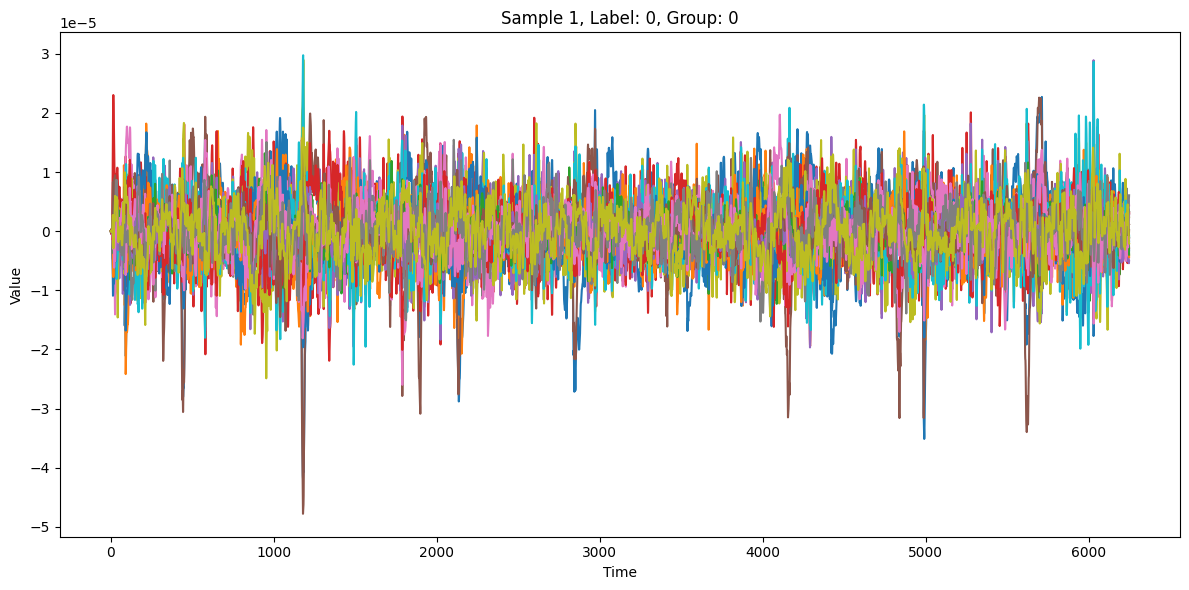

In [ ]:
import matplotlib.pyplot as plt

# Plot a few samples from data_array
num_samples_to_plot = 1

plt.figure(figsize=(12, 6))
for i in range(num_samples_to_plot):
    plt.subplot(num_samples_to_plot, 1, i+1)
    plt.plot(data_array[i].T)
    plt.title(f"Sample {i+1}, Label: {label_array[i+1]}, Group: {group_array[i+1]}")
    plt.xlabel("Time")
    plt.ylabel("Value")

plt.tight_layout()
plt.show()

#FEATURE EXTRACTION

In [ ]:
# Perform Statistical Feature extraction technique using 12 feature extraction
from scipy import stats
def mean(x):
  return np.mean(x,axis=-1)
def std(x):
  return np.std(x,axis=-1)
def ptp(x):
  return np.ptp(x,axis=-1)
def var(x):
  return np.var(x,axis=-1)
def minim(x):
  return np.min(x,axis=-1)
def maxim(x):
  return np.max(x,axis=-1)
def argminim(x):
  return np.argmin(x,axis=-1)
def argmaxim(x):
  return np.argmax(x,axis=-1)
def rms(x):
  return np.sqrt(np.mean(x**2, axis=-1))
def abs_diff_signal(x):
  return np.sum(np.abs(np.diff(x,axis=-1)), axis=-1)
def skewness(x):
  return stats.skew(x,axis=-1)
def kurtosis(x):
  return stats.kurtosis(x,axis=-1)

def concatenate_features(x):
  return np.concatenate((mean(x),std(x),ptp(x),var(x),minim(x),maxim(x),argminim(x),
                         argmaxim(x),rms(x),abs_diff_signal(x),skewness(x),kurtosis(x)),axis=-1)

In [ ]:
#Concatenate all the features into one
features=[]
for d in data_array:
  features.append(concatenate_features(d))

In [ ]:
features_array=np.array(features)
features_array.shape

(1189, 228)

#Machine Learning Model with Logistic Regression

In [ ]:
#import all dependencies
import seaborn as sns
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Note that features_array, label_array, and group_array are your feature, label, and group arrays

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, groups_train, groups_test = train_test_split(
    features_array, label_array.ravel(), group_array, test_size=0.2, random_state=42
)

# Create the pipeline
clf = LogisticRegression(solver='liblinear', max_iter=1000)
scaler = StandardScaler()
pipe = Pipeline([('scaler', scaler), ('clf', clf)])

# Set up the parameter grid
param_grid = {'clf__C': [0.1, 0.5, 0.7, 1, 3, 5, 7]}

# Set up GroupKFold for cross-validation
gkf = GroupKFold(n_splits=5)

# Set up GridSearchCV
gscv = GridSearchCV(pipe, param_grid, cv=gkf, n_jobs=12)

# Fit the model on the training set
gscv.fit(X_train, y_train, groups=groups_train)

GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        LogisticRegression(max_iter=1000,
                                                           solver='liblinear'))]),
             n_jobs=12, param_grid={'clf__C': [0.1, 0.5, 0.7, 1, 3, 5, 7]})

In [ ]:
# Make predictions on the test set
y_pred = gscv.predict(X_test)

# Evaluate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8823529411764706


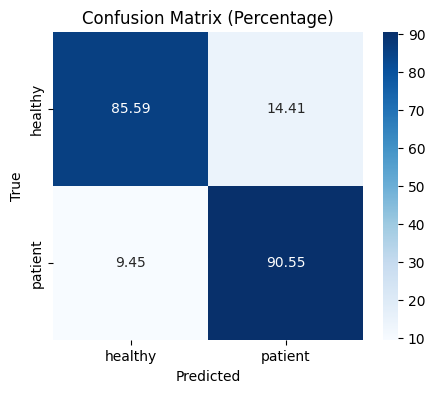

              precision    recall  f1-score   support

     healthy       0.89      0.86      0.87       111
     patient       0.88      0.91      0.89       127

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



In [ ]:
from sklearn.metrics import classification_report

# Map numerical labels to class names
class_labels = {0: 'healthy', 1: 'patient'}
y_test_labels = [class_labels[label] for label in y_test]
y_pred_labels = [class_labels[label] for label in y_pred]

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test_labels, y_pred_labels, labels=['healthy', 'patient'])

# Convert confusion matrix values to percentages
conf_mat_percent = (conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]) * 100

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=['healthy', 'patient'], yticklabels=['healthy', 'patient'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Print classification report with percentages
report = classification_report(y_test_labels, y_pred_labels, target_names=['healthy', 'patient'])
print(report)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred)
logreg_f1 = f1_score(y_test, y_pred)

#Deep Learning Model with Convolutional Neural Network (CNN)

In [ ]:
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(group_list)
data_array=np.moveaxis(data_array,1,2)

print(data_array.shape,label_array.shape,group_array.shape)

(1189, 6250, 19) (1189,) (1189,)


In [ ]:
#Using GroupKFold to perform cross-validation, and standardizing the features of each fold using StandardScaler.
#This is a good practice to ensure that the mean and standard deviation of the features are consistent across different folds.

for train_index, val_index in gkf.split(data_array, label_array, groups=group_array):
    train_features,train_labels=data_array[train_index],label_array[train_index]
    val_features,val_labels=data_array[val_index],label_array[val_index]
    scaler=StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)

In [ ]:
#features_array = train_features  # Shape: (944, 6250, 19)
#label_array = train_labels      # Shape: (944,)

features_array.shape, label_array.shape

((1189, 228), (1189,))

Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.5944
Epoch 1: val_accuracy improved from -inf to 0.50331, saving model to modelbest_acc.hdf5
19/19 [==============================] - 22s 984ms/step - loss: 0.6951 - accuracy: 0.5944 - val_loss: 0.6818 - val_accuracy: 0.5033
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 0.6016 - accuracy: 0.7070
Epoch 2: val_accuracy improved from 0.50331 to 0.64901, saving model to modelbest_acc.hdf5
19/19 [==============================] - 18s 934ms/step - loss: 0.6016 - accuracy: 0.7070 - val_loss: 0.6530 - val_accuracy: 0.6490
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.4522 - accuracy: 0.8079
Epoch 3: val_accuracy improved from 0.64901 to 0.72848, saving model to modelbest_acc.hdf5
19/19 [==============================] - 18s 935ms/step - loss: 0.4522 - accuracy: 0.8079 - val_loss: 0.6060 - val_accuracy: 0.7285
Epoch 4/50
19/19 [==============================] - 

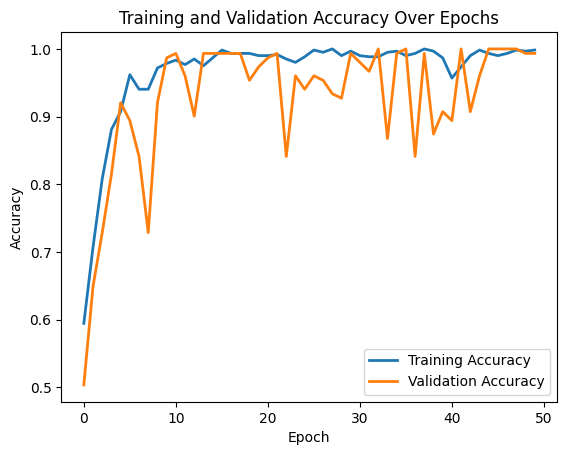

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# features and labels
features_array = train_features  # Shape: (907, 6250, 19)
label_array = train_labels      # Shape: (907,)

# Convert labels to one-hot encoded format
num_classes = 2
label_array_onehot = to_categorical(label_array, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_array, label_array_onehot, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(6250, 19)))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))  # Increased dropout rate

model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))  # Increased dropout rate

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))  # Increased dropout rate

model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Increased dropout rate
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with a reduced learning rate
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
es = EarlyStopping(monitor='val_loss', min_delta=0.01, mode='min', verbose=1, patience=25)
mc = ModelCheckpoint('modelbest_acc.hdf5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1, callbacks=[es, mc], shuffle=True)

# Evaluate on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')

# Plot accuracy against epochs
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)  # Adjusted linewidth for the training accuracy line
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)  # Adjusted linewidth for the validation accuracy line
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Add a border between legend entries
legend = plt.legend()
legend.legend_handles[0].set_linewidth(2)  # Adjusted linewidth for the training accuracy line in the legend
legend.legend_handles[1].set_linewidth(2)  # Adjusted linewidth for the validation accuracy line in the legend
legend.borderpad = 1.0  # Added borderpad to increase the space between legend entries

plt.title('Training and Validation Accuracy Over Epochs')
plt.show()

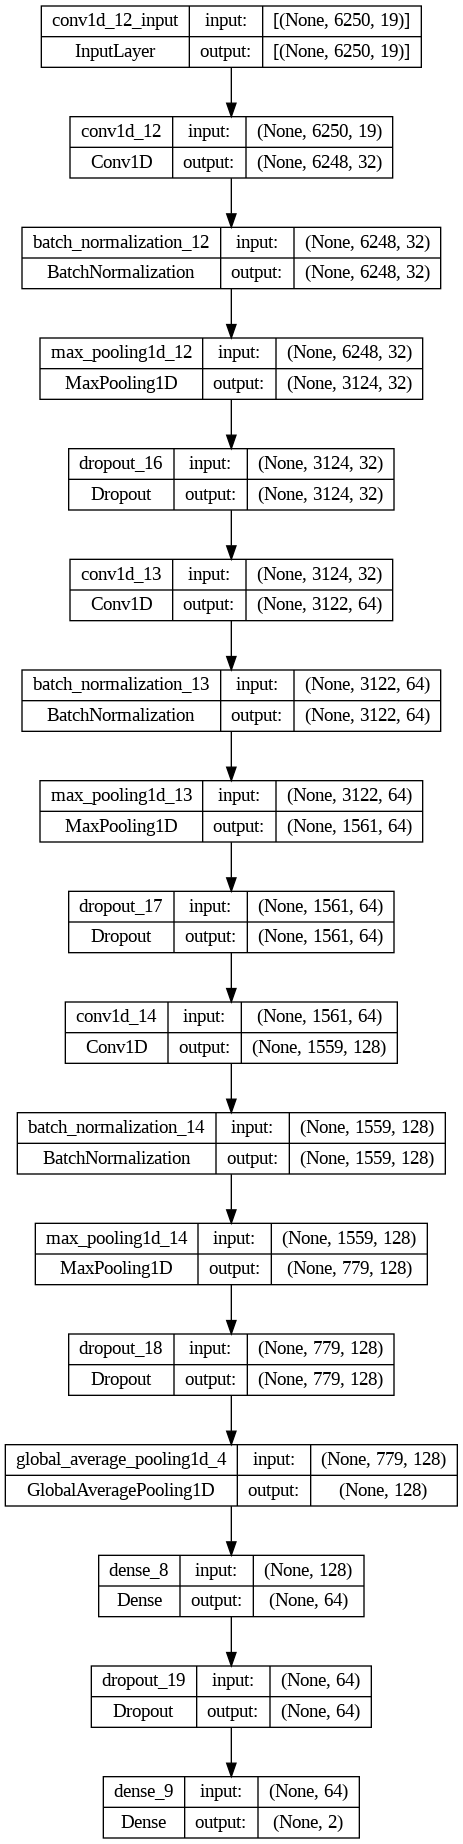

In [ ]:
from tensorflow.keras.utils import plot_model
# Visualize the model structure
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

6/6 [==============================] - 3s 331ms/step


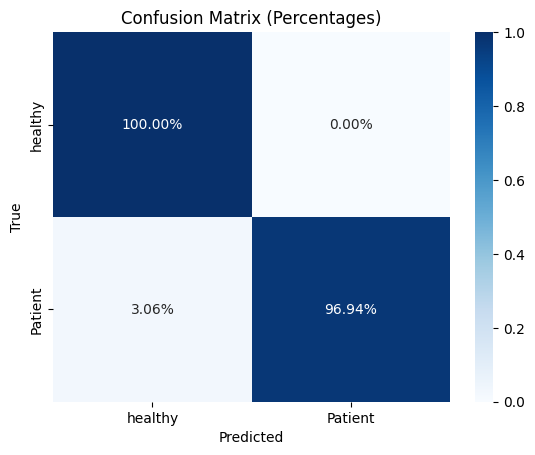

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        91
           1       1.00      0.97      0.98        98

    accuracy                           0.98       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.98      0.98      0.98       189

Test Accuracy: 0.9841269850730896


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Convert to percentage

# Plot percentage confusion matrix
sns.heatmap(cm_percentage, annot=True, fmt=".2%", cmap="Blues", xticklabels=['healthy', 'Patient'], yticklabels=['healthy', 'Patient'])
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_true_classes, y_pred_classes))

print(f'Test Accuracy: {accuracy}')

In [ ]:
# Calculate metrics
CNN_accuracy = accuracy_score(y_true_classes, y_pred_classes)
CNN_precision = precision_score(y_true_classes, y_pred_classes)
CNN_recall = recall_score(y_true_classes, y_pred_classes)
CNN_f1 = f1_score(y_true_classes, y_pred_classes)

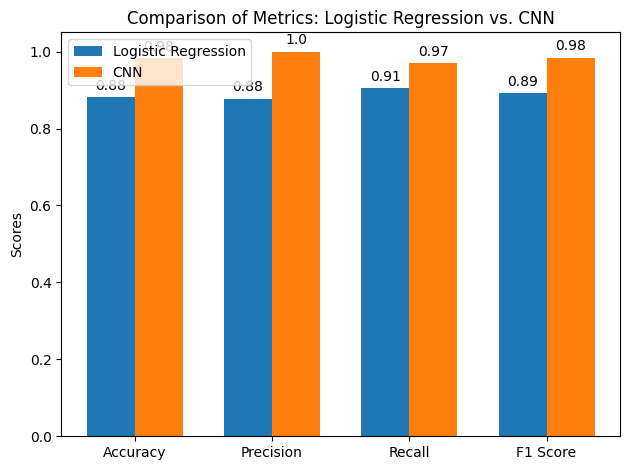

In [ ]:
# Create a bar plot
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
logreg_metrics = [logreg_accuracy, logreg_precision, logreg_recall, logreg_f1]
CNN_metrics = [CNN_accuracy, CNN_precision, CNN_recall, CNN_f1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, logreg_metrics, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, CNN_metrics, width, label='CNN')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics: Logistic Regression vs. CNN')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()